In [1]:
# Make the following code support python2 and python3
from __future__ import division, print_function, unicode_literals

# Check if the version of python is 3.5 and above
import sys
assert sys.version_info >= (3, 5)

# Check to see if sklearn is version 0.20 and above
import sklearn
assert sklearn.__version__ >= "0.20"
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.multioutput import RegressorChain
from sklearn.metrics import accuracy_score, r2_score, make_scorer, f1_score, recall_score, precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
import seaborn as sns
# The result obtained after each run is the same as that of this notebook
np.random.seed(42) 

# Make matplotlib diagrams work better
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


In [2]:
# Ignoring Unnecessary Warnings
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [3]:
orig_data = pd.read_excel('CPXOPX_T.xlsx')#D:\坚果云\合作 Projects\秦奔 Project\Big data project\Geobarameter\cpxthermobarameter\P.xlsx')#Preprocessing\\REE微量\\删除重复标签
 #orig_data.dropna(inplace=True) #delete missing value
#orig_data C:\\Users\\lenovo\\Desktop\\Trainingset\\finaltrain\\MAJOR1-4.xlsx

In [4]:
from sklearn.model_selection import StratifiedShuffleSplit

# Stratified sampling based on clustering results
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=2009)  #5   20230915-6
for train_index, test_index in split.split(orig_data, orig_data["Label"]):
    strat_train_set = orig_data.loc[train_index]
    strat_test_set = orig_data.loc[test_index]

In [5]:
strat_train_set

,T,SiO2_Cpx,TiO2_Cpx,Al2O3_Cpx,Cr2O3_Cpx,FeOt_Cpx,MnO_Cpx,MgO_Cpx,CaO_Cpx,Na2O_Cpx,SiO2_Opx,TiO2_Opx,Al2O3_Opx,Cr2O3_Opx,FeOt_Opx,MnO_Opx,MgO_Opx,CaO_Opx,Na2O_Opx,Label
244,900.0,52.810000,NaN,3.200000,1.960000,NaN,NaN,18.590000,23.430000,NaN,56.350000,NaN,4.080000,1.650000,NaN,NaN,37.550000,0.360000,NaN,9
474,1600.0,56.600000,NaN,1.900000,3.900000,NaN,NaN,24.900000,9.400000,NaN,58.200000,NaN,0.900000,2.300000,NaN,NaN,35.500000,1.400000,NaN,16
445,1000.0,54.591429,0.203214,0.473214,2.117143,1.989357,NaN,17.545429,20.681143,1.796500,57.782105,0.097079,0.171900,0.826268,4.840526,NaN,34.615789,0.596805,0.202847,10
318,1240.0,54.206667,0.730000,2.883333,0.863333,5.583333,0.070000,18.503333,14.286667,1.933333,56.874000,0.252000,1.552000,0.324000,6.410000,0.122000,32.668000,1.292000,0.280000,12
137,1400.0,54.640000,0.140000,2.540000,0.400000,4.950000,0.140000,23.580000,12.320000,0.870000,55.120000,0.090000,4.010000,0.340000,6.240000,0.120000,33.100000,1.200000,0.190000,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,1100.0,55.095380,0.042097,0.602235,1.028726,4.758607,0.044747,19.560036,18.060994,0.679701,56.639721,0.000000,0.697208,0.358317,7.758632,0.063546,32.829007,1.427314,0.063547,11
71,1375.0,51.700000,1.400000,7.400000,0.240000,4.900000,0.070000,18.900000,13.900000,1.760000,54.000000,0.580000,5.300000,0.240000,6.800000,0.070000,31.600000,1.690000,0.380000,14
3,1310.0,49.950000,0.370000,8.320000,0.510000,4.430000,0.120000,19.770000,15.690000,0.800000,51.660000,0.170000,7.390000,0.590000,5.810000,0.110000,31.770000,2.290000,0.130000,13
338,950.0,56.100000,0.190000,10.900000,0.630000,2.500000,0.070000,13.900000,10.500000,5.300000,57.000000,0.030000,2.200000,0.140000,5.100000,0.070000,34.600000,0.460000,0.330000,10


In [6]:
strat_test_set

,T,SiO2_Cpx,TiO2_Cpx,Al2O3_Cpx,Cr2O3_Cpx,FeOt_Cpx,MnO_Cpx,MgO_Cpx,CaO_Cpx,Na2O_Cpx,SiO2_Opx,TiO2_Opx,Al2O3_Opx,Cr2O3_Opx,FeOt_Opx,MnO_Opx,MgO_Opx,CaO_Opx,Na2O_Opx,Label
269,1300.0,55.130948,0.179693,1.930935,0.415177,5.715947,NaN,19.895333,15.334841,1.397127,56.562789,0.000000,1.614698,0.309193,6.570143,NaN,33.163834,1.289851,0.228544,13
456,750.0,53.870000,NaN,2.340000,NaN,3.640000,NaN,26.710000,13.750000,0.042000,57.930000,NaN,0.270000,NaN,4.730000,NaN,36.170000,0.476000,0.023000,8
390,1150.0,54.643467,0.137253,1.906318,0.564706,2.804640,NaN,18.838381,20.456426,0.648809,57.388880,0.000000,1.394687,0.324256,5.429851,NaN,34.450470,1.011856,0.000000,12
195,1100.0,53.860000,0.160000,2.120000,0.700000,2.660000,0.06,18.470000,19.970000,0.920000,55.890000,0.100000,1.740000,0.410000,5.300000,0.08,34.460000,0.990000,0.100000,11
265,1200.0,52.640000,NaN,3.160000,2.890000,NaN,NaN,19.970000,21.340000,NaN,56.530000,NaN,3.390000,1.840000,NaN,NaN,37.140000,1.110000,NaN,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,1300.0,57.000000,0.000000,0.000000,0.000000,0.100000,0.00,18.500000,24.800000,0.040000,57.000000,0.200000,0.900000,0.500000,7.400000,NaN,33.400000,1.200000,NaN,13
418,1100.0,54.877466,0.162538,2.308703,0.752319,2.901801,NaN,18.151180,19.325434,1.261825,57.580567,0.000000,1.322061,0.459933,4.915077,NaN,34.959498,0.762863,0.000000,11
351,1200.0,56.600000,0.000000,0.000000,0.000000,0.200000,0.00,19.500000,24.300000,0.010000,57.100000,0.100000,0.900000,0.100000,12.900000,NaN,27.000000,0.800000,0.090000,12
214,1175.0,53.900000,0.260000,4.900000,1.900000,2.600000,0.11,16.700000,16.500000,2.300000,56.100000,0.080000,3.800000,0.700000,4.900000,0.10,32.900000,1.040000,0.300000,12


In [7]:
strat_test_set["Label"].value_counts()

12    25
11    17
10    17
14    15
13    14
9      6
15     5
8      2
7      1
16     1
Name: Label, dtype: int64

In [8]:
# Separate features and labels
#c = orig_data['Mean_age']
X_train = strat_train_set.drop(['T','Label'], axis=1).copy()  #,'T'
y_train = strat_train_set[['T']]

X_test = strat_test_set.drop(['T','Label'], axis=1).copy()
y_test = strat_test_set[['T']]

In [9]:
X_test

,SiO2_Cpx,TiO2_Cpx,Al2O3_Cpx,Cr2O3_Cpx,FeOt_Cpx,MnO_Cpx,MgO_Cpx,CaO_Cpx,Na2O_Cpx,SiO2_Opx,TiO2_Opx,Al2O3_Opx,Cr2O3_Opx,FeOt_Opx,MnO_Opx,MgO_Opx,CaO_Opx,Na2O_Opx
269,55.130948,0.179693,1.930935,0.415177,5.715947,NaN,19.895333,15.334841,1.397127,56.562789,0.000000,1.614698,0.309193,6.570143,NaN,33.163834,1.289851,0.228544
456,53.870000,NaN,2.340000,NaN,3.640000,NaN,26.710000,13.750000,0.042000,57.930000,NaN,0.270000,NaN,4.730000,NaN,36.170000,0.476000,0.023000
390,54.643467,0.137253,1.906318,0.564706,2.804640,NaN,18.838381,20.456426,0.648809,57.388880,0.000000,1.394687,0.324256,5.429851,NaN,34.450470,1.011856,0.000000
195,53.860000,0.160000,2.120000,0.700000,2.660000,0.06,18.470000,19.970000,0.920000,55.890000,0.100000,1.740000,0.410000,5.300000,0.08,34.460000,0.990000,0.100000
265,52.640000,NaN,3.160000,2.890000,NaN,NaN,19.970000,21.340000,NaN,56.530000,NaN,3.390000,1.840000,NaN,NaN,37.140000,1.110000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,57.000000,0.000000,0.000000,0.000000,0.100000,0.00,18.500000,24.800000,0.040000,57.000000,0.200000,0.900000,0.500000,7.400000,NaN,33.400000,1.200000,NaN
418,54.877466,0.162538,2.308703,0.752319,2.901801,NaN,18.151180,19.325434,1.261825,57.580567,0.000000,1.322061,0.459933,4.915077,NaN,34.959498,0.762863,0.000000
351,56.600000,0.000000,0.000000,0.000000,0.200000,0.00,19.500000,24.300000,0.010000,57.100000,0.100000,0.900000,0.100000,12.900000,NaN,27.000000,0.800000,0.090000
214,53.900000,0.260000,4.900000,1.900000,2.600000,0.11,16.700000,16.500000,2.300000,56.100000,0.080000,3.800000,0.700000,4.900000,0.10,32.900000,1.040000,0.300000


In [10]:
y_test

,T
269,1300.0
456,750.0
390,1150.0
195,1100.0
265,1200.0
...,...
337,1300.0
418,1100.0
351,1200.0
214,1175.0


In [11]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [12]:
#roc_auc_score = make_scorer(roc_auc_score, multi_class='ovo',needs_proba=True) #3 classes roc_auc
#f1_score = make_scorer(f1_score, multi_class='ovo',needs_proba=True)
#recall_score = make_scorer(recall_score, multi_class='ovo',needs_proba=True)
#precision_score = make_scorer(precision_score, multi_class='ovo',needs_proba=True)

In [13]:
from sklearn.metrics import mean_squared_error
xgb_clf = XGBRegressor(base_score = 0,
        booster ='gbtree',
        objective='reg:squarederror',
        colsample_bylevel = 1,
        colsample_bynode = 1,
        max_delta_step = 0,
        reg_alpha = 0.6,
        reg_lambda = 0.3,
        tree_method = 'exact',
        validate_parameters = 9,
        num_parallel_tree = 2,
        colsample_bytree = 0.8,
        eta = 0.1,    #0.1
        #silent: 
        subsample = 0.8,
        max_depth = 9,
        min_child_weight = 20,
        gamma = 0.5,
        n_estimators = 100,
        random_state = 10,) #objective='reg:squarederror' reg:logistic   MultiOutputRegressor RegressorChain alpha=1,gamma=3
xgb_clf.fit(X_train, y_train) 
y_pred_xgb = xgb_clf.predict(X_train)


Train_r2= np.around(r2_score(y_train, y_pred_xgb), decimals=3)
Train_rmse = np.around(mean_squared_error(y_train, y_pred_xgb), decimals=3)

print("Train_r2 =",Train_r2)
print("Train RMSE = ",Train_rmse)


Train_r2 = 0.966
Train RMSE =  1079.07


In [14]:
from sklearn.model_selection import cross_val_score

# Ten-fold cross validation      neg_mean_absolute_error
scores = cross_val_score(xgb_clf, X_train, y_train,
                        scoring = "r2", cv=5,
                        n_jobs=-1)
def display_scores(scores):

    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
display_scores(scores)

Scores: [0.64140578 0.79914582 0.8548299  0.71362141 0.7696712 ]
Mean: 0.7557348214868091
Standard deviation: 0.07313445153688748


In [15]:
xgb_clf.feature_importances_

array([0.01667708, 0.01698007, 0.01966266, 0.03425439, 0.05870697,
       0.02735851, 0.12198118, 0.08531033, 0.03167486, 0.02463839,
       0.01607152, 0.02210594, 0.03760552, 0.02249045, 0.01728808,
       0.0205065 , 0.38248163, 0.04420589], dtype=float32)

In [16]:
y_test_pred_xgb = xgb_clf.predict(X_test)


Test_r2= np.around(r2_score(y_test, y_test_pred_xgb), decimals=3)
Test_rmse = mean_squared_error(y_test, y_test_pred_xgb)

print("Test_r2 =",Test_r2)
print("Test RMSE = ",Test_rmse)

Test_r2 = 0.816
Test RMSE =  5787.051190480409


In [17]:
a=y_test['T']-y_test_pred_xgb

In [18]:
a
a.to_excel('output.xlsx', sheet_name='Sheet1', index=False)

dfa = pd.DataFrame(a)
dfa.to_excel('Error_T.xlsx')
dfb = pd.DataFrame(X_test)
dfb.to_excel('X_test_T.xlsx')
dfc = pd.DataFrame(y_test)
dfc.to_excel('y_test_T.xlsx')

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


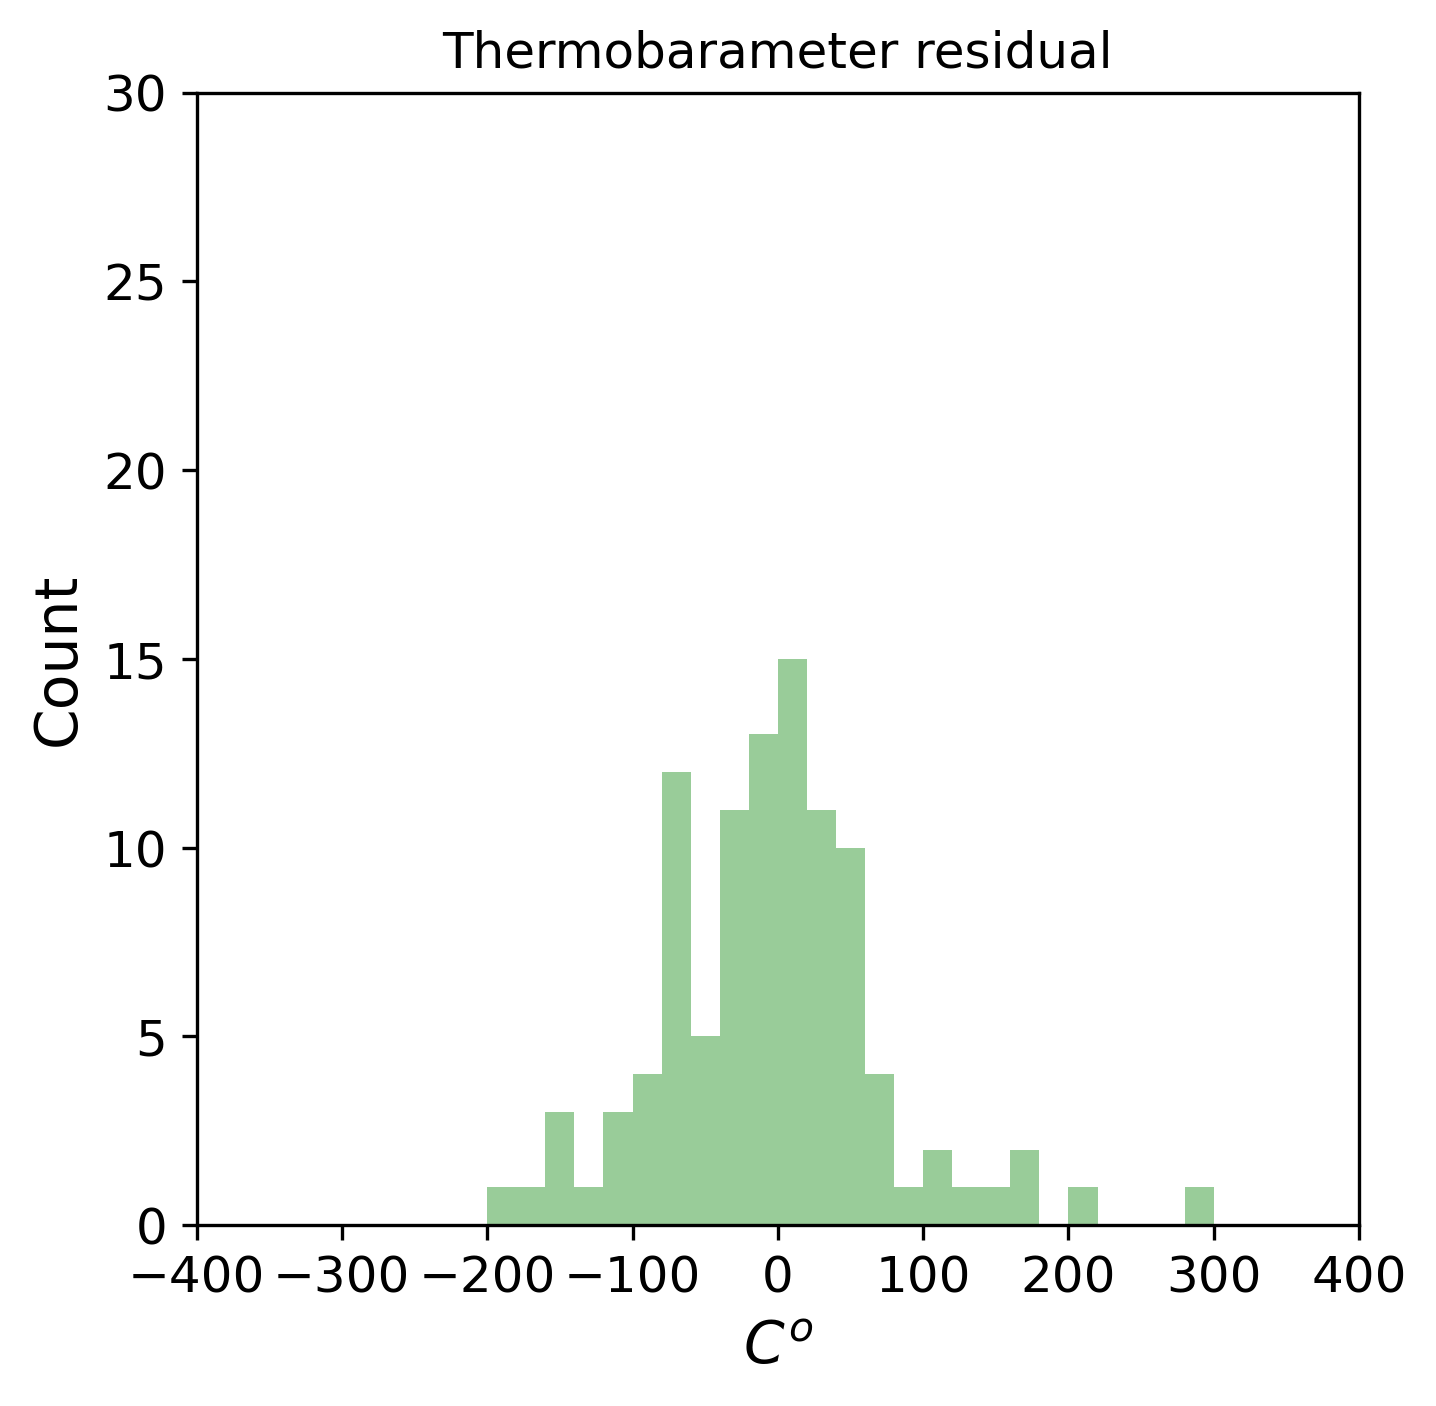

In [19]:
# 投分布图
import seaborn as sns
plt.figure(figsize=(5,5),dpi=300)

ax1 = plt.subplot(111)
ax1 = sns.distplot(a, bins = np.arange(-400,400,20), kde = False, hist_kws = {'color':'green'})
ax1.set_xlim((-400,400))
ax1.set_xticks([-400,-300,-200,-100,0,100,200,300,400])
ax1.set_ylim((0,30))
#plt.legend()
ax1.set_ylabel('Count')
ax1.set_xlabel(r'$C^o$')

plt.subplots_adjust(wspace=0, hspace=0)
plt.title("Thermobarameter residual")
plt.show()

In [20]:
plt.figure(figsize = (9,9),dpi=900)

#p1 = max(max(y_test_pred_xgb),max(y_test))
#p2 = min(min(y_test_pred_xgb),min(y_test))
plt.plot()
plt.xlabel('Predicted Values ($C^o$)', fontsize =20)
plt.ylabel('True  Values ($C^o$)', fontsize =20)
plt.xlim((600, 1800))
plt.ylim((600, 1800))

plt.scatter(y_pred_xgb,y_train,marker='^',facecolors='none', edgecolors='darkorange', s=150,label=r'R2(train)={}'.format(Train_r2))
plt.scatter(y_test_pred_xgb,y_test,marker='o', s=70,label=r'R2(test)={}'.format(Test_r2))
plt.scatter(y_pred_xgb,y_train,marker='o',alpha=0 ,label=r'RMSE(train)={}'.format(Train_rmse))
# 添加y=x-1直线
plt.plot((600, 1900), (600,1900), ls='-',c='k')  #, label="y = x"
plt.plot((600, 1900), (500, 1800), ls='--', c='gray') # , label="y = x ± 100"
# 添加y=x+1直线
plt.plot((600, 1900), (700, 2000), ls='--', c='gray')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.tick_params(axis='both', which='both', length=8)
plt.legend(loc='upper left',frameon=False, fontsize=17)
 
plt.title("CPXOPX thermometer", fontsize=20)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

In [21]:
#predict the non label data
predict_data = pd.read_excel ('global预测.xlsx',sheet_name='Sheet1')   
#'C:\\Users\\LENOVO\\Documents\\mantle_xenelith\\ML温压计\\预测集\\Ca_isotope.xlsx',sheet_name='Sheet2'
#process = preprocessing.StandardScaler()
x_predict_data = predict_data # process.fit_transform(predict_data)

In [22]:
predict_results = xgb_clf.predict(x_predict_data)

In [23]:
predict_results

array([1074.5121, 1340.2192, 1201.1605, ..., 1007.7105,  979.6144,
        969.3767], dtype=float32)

In [24]:
df = pd.DataFrame(data=predict_results)
df.to_excel('global预测T.xlsx')

In [ ]:
y_test_pred_xgb = xgb_clf.predict(X_test)


Test_r2= np.around(r2_score(y_test, y_test_pred_xgb), decimals=3)
Test_rmse = mean_squared_error(y_test, y_test_pred_xgb)

print("Test_r2 =",Test_r2)
print("Test RMSE = ",Test_rmse)

pred['P']

a=y_test['P']-y_test_pred_xgb

a

# 投分布图
import seaborn as sns
plt.figure(figsize=(5,5),dpi=300)

ax1 = plt.subplot(111)
ax1 = sns.distplot(a, bins = np.arange(-15,10,1), kde = False, hist_kws = {'color':'green'})
ax1.set_xlim((-15,10))
ax1.set_ylim((0,30))
#plt.legend()
ax1.set_ylabel('Count')
ax1.set_xlabel('kbar')

plt.subplots_adjust(wspace=0, hspace=0)
plt.title("Thermobarameter residual")
plt.show()

plt.figure(figsize = (9,9))

#p1 = max(max(y_test_pred_xgb),max(y_test))
#p2 = min(min(y_test_pred_xgb),min(y_test))
plt.plot()
plt.xlabel('Predicted Values (kbar)', fontsize =20)
plt.ylabel('True  Values (kbar)', fontsize =20)

plt.plot((0, 70), (0, 70), ls='-',c='k', label="1:1 line")
plt.scatter(y_pred_xgb,y_train,marker='o',label=r'$R^2(train)=${}'.format(Train_r2))
plt.scatter(y_test_pred_xgb,y_test,marker='o',label=r'$R^2(test)=${}'.format(Test_r2))

plt.legend(loc='upper left', fontsize=14)
 
plt.title("XGB cpx thermobarameter", fontsize=15)
plt.show

#predict the non label data
predict_data = pd.read_excel ('D:\坚果云\合作 Projects\秦奔 Project\Big data project\Geobarameter\cpxthermobarameter\prediction_P.xlsx')  

#process = preprocessing.StandardScaler()
x_predict_data = predict_data # process.fit_transform(predict_data)

predict_results = xgb_clf.predict(x_predict_data)

predict_results

df = pd.DataFrame(data=predict_results)
df.to_excel('predict_results_P.xlsx')

In [14]:
# show feature importance
for feature_name, score in zip(list(X.columns), xgb_clf.feature_importances_):
    print(feature_name, ":", score)

AttributeError: 'MultiOutputRegressor' object has no attribute 'feature_importances_'

In [63]:
learning_rate = [ 0.1, 0.2, 0.5,0.6,0.7]
depth = [3, 4, 5, 6, 7]
min_split = [0.1,0.2,0.5, 1, 2, 3]
alpha1 = [0.1,0.3,0.5,0.7,0.9, 1]
#colsample_bytree= [0.5,0.6,0.7,0.8,0.9,1]
#n_estimiter = [100,200,300,500,800,1000]  
#weight gain cover #,n_estimators=1000

In [64]:
xgb = XGBRegressor(objective='reg:squarederror',
                     tree_method='hist', seed=2021,importance_type = 'cover')#eval_metric = 'r2',

In [ ]:
xgb_cv = GridSearchCV(xgb, param_grid = {'eta': learning_rate, 'gamma': min_split, 'max_depth': depth, 'alpha':alpha1}, 
                      cv=2,scoring='r2') 
xgb_cv.fit(X_train, y_train)

In [15]:
#xgb_cv.best_params_

In [16]:
xgb_cv.best_score_

0.7036358053485368

In [17]:
xgb_cv.best_estimator_

XGBRegressor(alpha=0.7, base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False, eta=0.1,
             eval_metric=None, gamma=1, gpu_id=-1, grow_policy='depthwise',
             importance_type='cover', interaction_constraints='',
             learning_rate=0.100000001, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=2021, ...)

In [18]:
features = list(X.columns)
importances = xgb_cv.best_estimator_.feature_importances_
indices = np.argsort(importances)

In [19]:
df4 = pd.DataFrame({'features':features,'importances':importances})
#df4.to_excel('fig5-trace.xlsx')

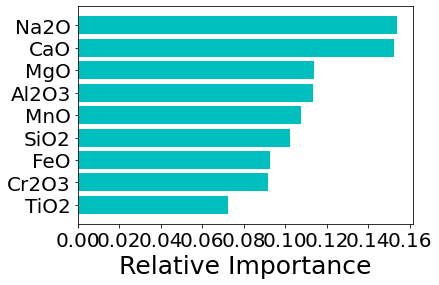

In [20]:
plt.barh(range(len(indices)), importances[indices], color='c', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices], fontsize=20)
plt.xticks(fontsize=20)
plt.xlabel('Relative Importance',fontsize=25)
plt.savefig('Major1 Feature.png', dpi=900)
plt.show()
plt.rcParams["figure.figsize"] = (20, 10)


In [21]:
from sklearn.model_selection import cross_val_score

# ten-fold cross validation
scores = cross_val_score(xgb_cv.best_estimator_, X_train, y_train,
                        scoring = "r2", cv=10,
                        n_jobs=-1)
def display_scores(scores):
    
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
display_scores(scores)

Scores: [0.58828705 0.82048991 0.67783965 0.67236645 0.6914376  0.66497122
 0.74880237 0.76942119 0.55462367 0.84811894]
Mean: 0.7036358053485368
Standard deviation: 0.0892720031160037


In [22]:
# predict the test data set
xgb_test = xgb_cv.best_estimator_
xgb_test.fit(X_train,y_train)
y_test_pred = xgb_test.predict(X_test)

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

test_rmse = np.around(np.sqrt(mean_squared_error(y_test, y_test_pred)), decimals=3)
train_r2 = np.around(r2_score(y_test, y_test_pred), decimals=3)
test_r2 = np.around(r2_score(y_test, y_test_pred), decimals=3)



print("TEST RMSE = ",test_rmse)

print("TEST R2 =",test_r2)

TEST RMSE =  12.334
TEST R2 = 0.734


0.0

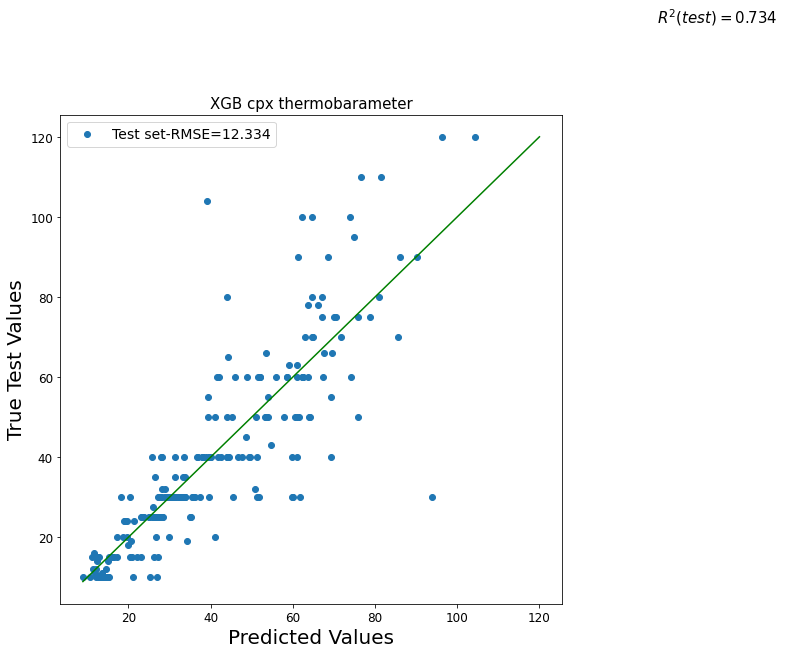

In [24]:
plt.figure(figsize = (9,9))

p1 = max(max(y_test_pred),max(y_test))
p2 = min(min(y_test_pred),min(y_test))
plt.plot([p1,p2],[p1,p2],'green')
plt.xlabel('Predicted Values', fontsize =20)
plt.ylabel('True Test Values', fontsize =20)

plt.scatter(y_test_pred,y_test,marker='o',label="Test set-RMSE={}".format(test_rmse))


plt.legend(loc='upper left', fontsize=14)

text_position = [150, 150]
#plt.text(text_position[0]-2.3, text_position[1]-1.2,
#             r'$R^2(train)=${}'.format(train_r2),
#             fontdict={'size': 15, 'color': '#000000'})
plt.text(text_position[1]-1.3, text_position[0]-1.5,
             r'$R^2(test)=${}'.format(test_r2),
             fontdict={'size': 15, 'color': '#000000'})
 
plt.title("XGB cpx thermobarameter", fontsize=15)
plt.show

cha = train_r2 - test_r2
cha


In [86]:
#predict the non label data
predict_data = pd.read_excel ('C:\\Users\\lenovo\\Desktop\\Trainingset\\预测数据\\MAJOR.xlsx')

#process = preprocessing.StandardScaler()
x_predict_data = predict_data # process.fit_transform(predict_data)

In [ ]:
predict_results = xgb_cv.best_estimator_.predict_proba(x_predict_data)

In [ ]:
predict_results

In [ ]:
df = pd.DataFrame(data=predict_results)
df.to_excel('predict_resultsMAJOR2.xlsx')

In [ ]:
###Xgboost end